In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
consumerKey = 'E39cshUel1sCtP6rb0E4hsaeZ'
consumerSecret = 'rmuQx9317MT8NOeXbHHKGxugoDjIR1w2TE9sv0UkB72I6sYqMx'

accessToken = '2924217373-uN1nFKht2Z7F937C4X9rfd8ejcqdtGIe6CUxSVb'

accessTokenSecret ='IDLWbH5vcYpIsMg8Rt93dhVNBtLwvBx1IR1SGgpRMDa10'

In [3]:
# Create an Authentication Object
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken,accessTokenSecret)

# Creating the API object while passing in auth information
api = tweepy.API(authenticate,wait_on_rate_limit=True)


In [4]:
post = api.user_timeline(screen_name="NarendraModi",count = 100,lang='en',tweet_mode ='extended')

#  Print the last 5 tweets

print("Show The 5 recent Tweet:\n")
i = 1
for tweet in post[:5]:
    print(str(i)+ ':'+ tweet.full_text + '\n')
    i +=1

Show The 5 recent Tweet:

1:On the special occasion of Ashadhi Bij, greetings to the Kutchi community. This is a community known for its great culture and bravery. I pray that the coming year is filled with happiness and good health.

2:અચીંધલ નઉં વરેં ભરકત વારો નિવડ઼ે, સચરાચરો મીં વસે, કચ્છી ભા, ભેણું મિડ઼ે સદાય ખુશ રેં અને મિણીજોઆરોગ્ય 
ખાસો રે એડ઼ી કચ્છ જી કુળદેવી મા આશાપુરા વટે અરધાસ.

3:કચ્છડ઼ો ખેલે ખલકમેં, જીં મહાસાગરમેં મચ્છ, 
જિતે હિકડ઼ો કચ્છી વસે, ઉતે ડીંયાડીં કચ્છ. 

કચ્છજે ભવ્ય અને અણમોલ સાંસ્કૃતિક 
વારસેકે સાચવીંધલ કચ્છજી ખડ઼તલ અને ખમીરવંતી પ્રજા, ડેશ અને પરડેશમેં વસધલ સવાયા કચ્છી ભા, ભેણેકે અજ આષાઢી બીજ અને કચ્છી નયેં વરેંજે પાવન અવસર તેં લખ લખ વધાઇયું.

4:मां भारती के महान सपूत डॉ. श्यामा प्रसाद मुखर्जी को उनकी पुण्यतिथि पर शत-शत नमन।

5:भगवान जगन्नाथ की रथ यात्रा के पावन-पुनीत अवसर पर आप सभी को मेरी हार्दिक शुभकामनाएं। मेरी कामना है कि श्रद्धा और भक्ति से भरी यह यात्रा देशवासियों के जीवन में सुख, समृद्धि, सौभाग्य और आरोग्य लेकर आए। जय जगन्नाथ!



In [5]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in post],columns=['Tweets'])

df.head()

,Tweets
0,"On the special occasion of Ashadhi Bij, greeti..."
1,"અચીંધલ નઉં વરેં ભરકત વારો નિવડ઼ે, સચરાચરો મીં ..."
2,"કચ્છડ઼ો ખેલે ખલકમેં, જીં મહાસાગરમેં મચ્છ, \nજિ..."
3,मां भारती के महान सपूत डॉ. श्यामा प्रसाद मुखर्...
4,भगवान जगन्नाथ की रथ यात्रा के पावन-पुनीत अवसर ...


In [6]:
# creating a function to clean the tweets
def clean(text):
    text = re.sub('@[A-Za-z0–9]+', '', text)
    text = re.sub('#', '', text)
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

df['Tweets'] = df['Tweets'].apply(clean)


In [7]:
df.head()

,Tweets
0,"On the special occasion of Ashadhi Bij, greeti..."
1,"અચીંધલ નઉં વરેં ભરકત વારો નિવડ઼ે, સચરાચરો મીં ..."
2,"કચ્છડ઼ો ખેલે ખલકમેં, જીં મહાસાગરમેં મચ્છ, \nજિ..."
3,मां भारती के महान सपूत डॉ. श्यामा प्रसाद मुखर्...
4,भगवान जगन्नाथ की रथ यात्रा के पावन-पुनीत अवसर ...


In [8]:
# create a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [9]:
df.head()

,Tweets,Subjectivity,Polarity
0,"On the special occasion of Ashadhi Bij, greeti...",0.604286,0.591429
1,"અચીંધલ નઉં વરેં ભરકત વારો નિવડ઼ે, સચરાચરો મીં ...",0.000000,0.000000
2,"કચ્છડ઼ો ખેલે ખલકમેં, જીં મહાસાગરમેં મચ્છ, \nજિ...",0.000000,0.000000
3,मां भारती के महान सपूत डॉ. श्यामा प्रसाद मुखर्...,0.000000,0.000000
4,भगवान जगन्नाथ की रथ यात्रा के पावन-पुनीत अवसर ...,0.000000,0.000000


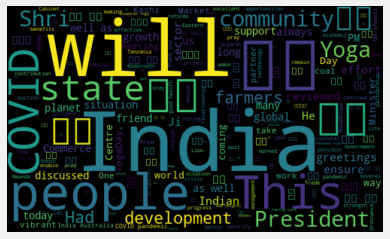

In [10]:
# word cloud

words = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(words)


plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [12]:
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,"On the special occasion of Ashadhi Bij, greeti...",0.604286,0.591429,Positive
1,"અચીંધલ નઉં વરેં ભરકત વારો નિવડ઼ે, સચરાચરો મીં ...",0.000000,0.000000,Neutral
2,"કચ્છડ઼ો ખેલે ખલકમેં, જીં મહાસાગરમેં મચ્છ, \nજિ...",0.000000,0.000000,Neutral
3,मां भारती के महान सपूत डॉ. श्यामा प्रसाद मुखर्...,0.000000,0.000000,Neutral
4,भगवान जगन्नाथ की रथ यात्रा के पावन-पुनीत अवसर ...,0.000000,0.000000,Neutral


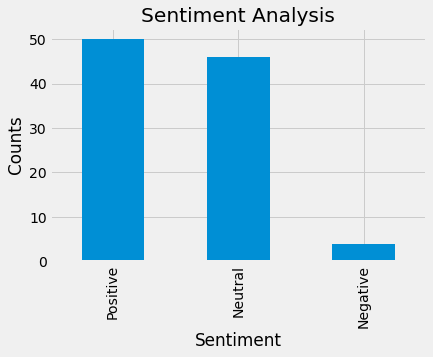

In [13]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()